In [522]:
#importing the necessary libraries
#for loading dataset analysis
import pandas as pd
#for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#for preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#training the model
from sklearn.linear_model import LinearRegression
#for evaluvation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [523]:
#loading the dataset
df=pd.read_csv("car_data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [524]:
# Using the describe function to generate descriptive statistics of the dataset.
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


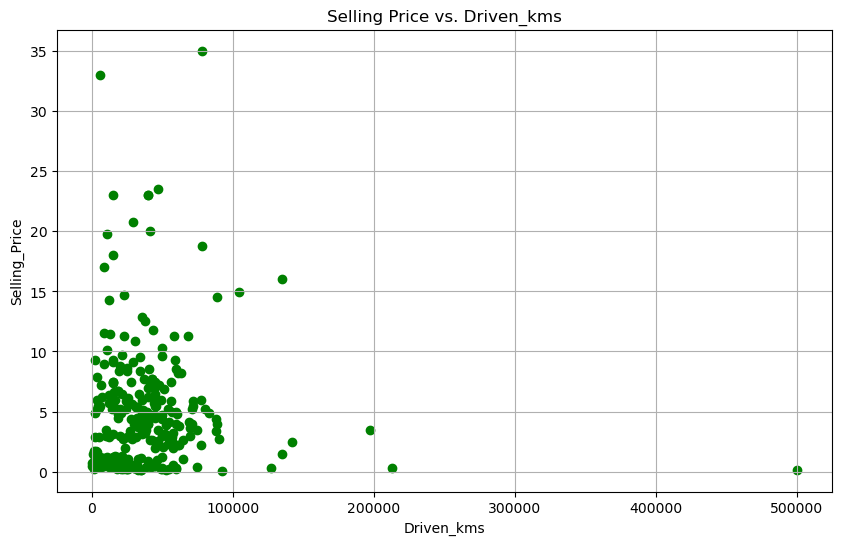

In [525]:
#scatter plot for identifying relation between selling price and driven kms
plt.figure(figsize=(10, 6))
plt.scatter(df['Driven_kms'], df['Selling_Price'], color='green', marker='o')
plt.title('Selling Price vs. Driven_kms')
plt.xlabel('Driven_kms')
plt.ylabel('Selling_Price')
plt.grid(True)
plt.show()

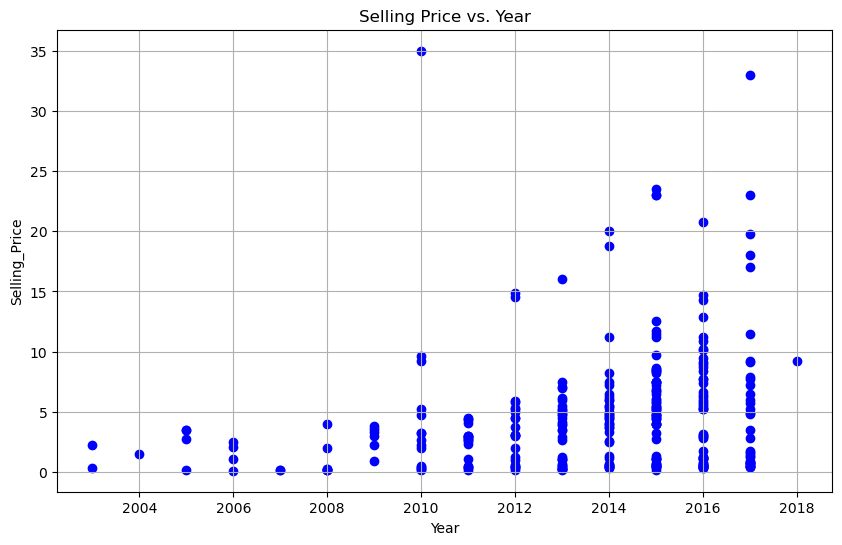

In [526]:
#visualising the relationship between selling price and year
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Selling_Price'], color='blue', marker='o')
plt.title('Selling Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Selling_Price')
plt.grid(True)
plt.show()

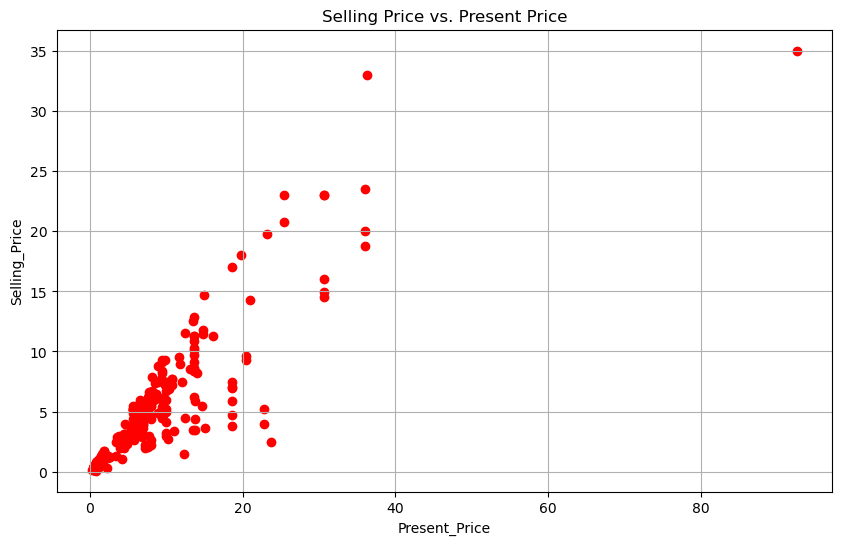

In [527]:
#visualising the relation between selling price and present price
plt.figure(figsize=(10, 6))
plt.scatter(df['Present_Price'], df['Selling_Price'], color='red', marker='o')
plt.title('Selling Price vs. Present Price')
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.grid(True)
plt.show()

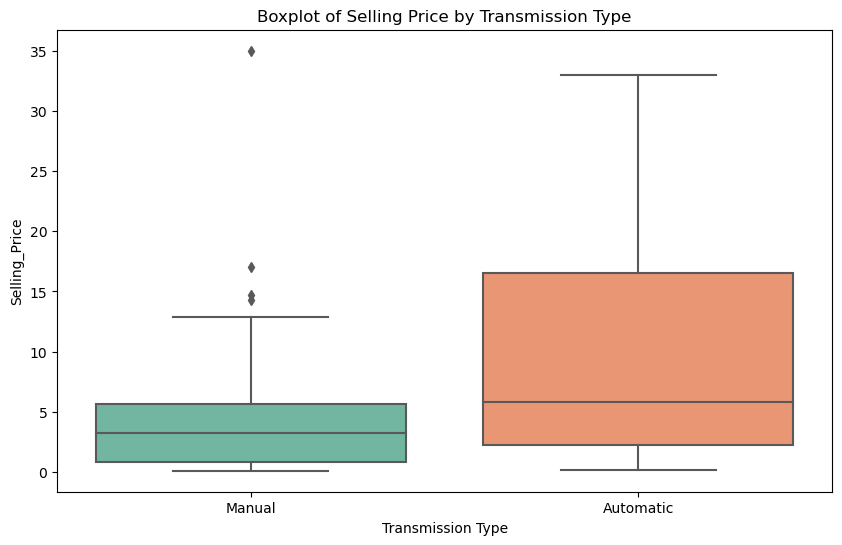

In [528]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Selling_Price', data=df, palette='Set2')
plt.title('Boxplot of Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Selling_Price')
plt.show()

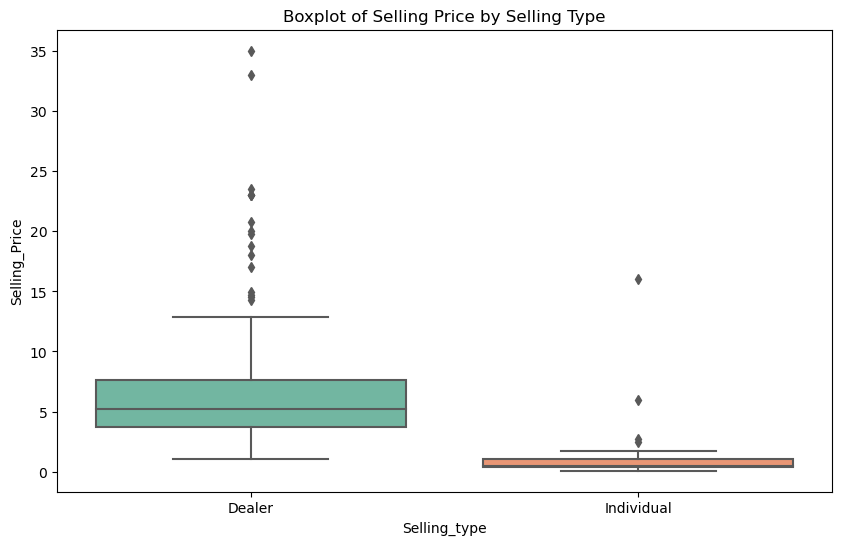

In [529]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Selling_type', y='Selling_Price', data=df, palette='Set2')
plt.title('Boxplot of Selling Price by Selling Type')
plt.xlabel('Selling_type')
plt.ylabel('Selling_Price')
plt.show()

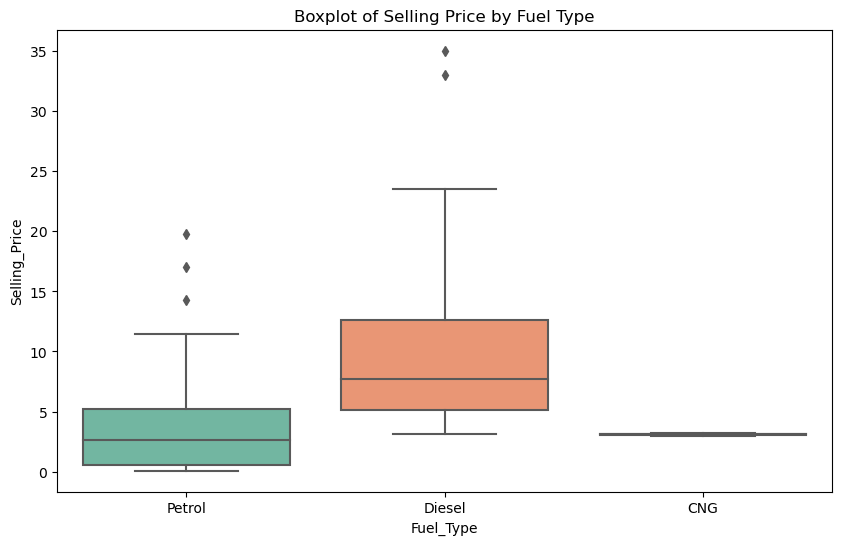

In [530]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df, palette='Set2')
plt.title('Boxplot of Selling Price by Fuel Type')
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19308\3272269689.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


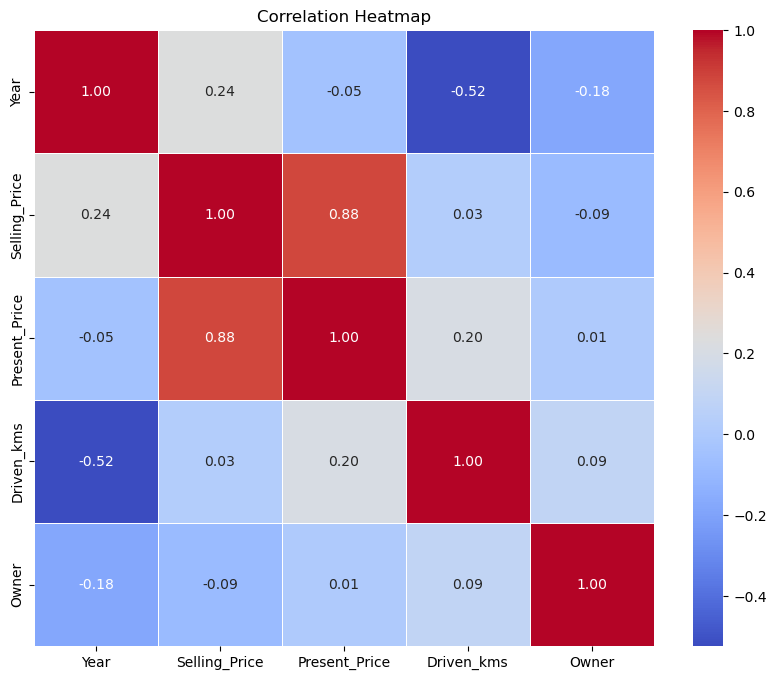

In [531]:
df.drop(["Car_Name","Fuel_Type","Selling_type","Transmission"],axis=1)
correlation_matrix=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [532]:
#feature engineering the number of owners
def multiple_owners(owner):
    if owner>0:
        owner=1
    else:
        owner=0
    return owner
df['MultipleOwner']=df['Owner'].apply(multiple_owners)
df.drop("Owner",axis=1,inplace=True)
#extracting only the car brand from car names
df['Car_Brand'] = df['Car_Name'].str.split(' ').str[0]
df.drop('Car_Name',axis=1,inplace=True)

In [533]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,MultipleOwner,Car_Brand
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,ritz
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,sx4
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,ciaz
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,wagon
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,swift


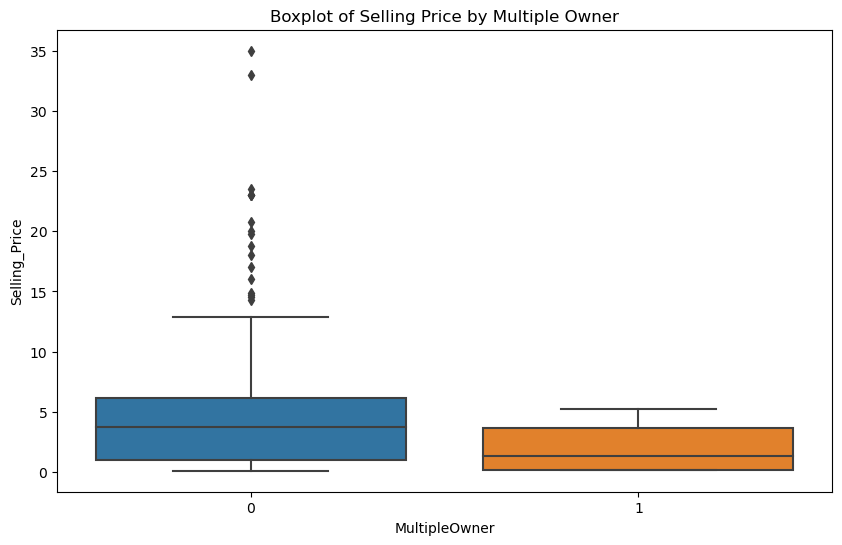

In [534]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='MultipleOwner',y='Selling_Price',data=df)
plt.title('Boxplot of Selling Price by Multiple Owner')
plt.xlabel('MultipleOwner')
plt.ylabel('Selling_Price')
plt.show()

In [535]:
#identifying and removing the outliers in selling price
df[df['Selling_Price']>df.Selling_Price.mean()+3*df.Selling_Price.std()]
df=df[df['Selling_Price']<=df.Selling_Price.mean()+3*df.Selling_Price.std()]
#identifying and removing the outliers in present price
df[df['Present_Price']>df.Present_Price.mean()+3*df.Present_Price.std()]
df=df[df['Present_Price']<=df.Present_Price.mean()+3*df.Present_Price.std()]
#identifying and removing the outliers in driven kms
df[df['Driven_kms']>df.Driven_kms.mean()+3*df.Driven_kms.std()]
df=df[df['Driven_kms']<=df.Driven_kms.mean()+3*df.Driven_kms.std()]

In [536]:
#checking for null values and removing them
df.isnull().sum()#no null values

Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
MultipleOwner    0
Car_Brand        0
dtype: int64

In [537]:
#converting the categorical variables
FuelType=pd.get_dummies(df.Fuel_Type,drop_first=True)
SellingType=pd.get_dummies(df.Selling_type,drop_first=True)
transmission=pd.get_dummies(df.Transmission,drop_first=True)
car_brand_counts = df['Car_Brand'].value_counts()
df['Car_Brand_Frequency'] = df['Car_Brand'].map(car_brand_counts)

In [538]:
#removing the categorical columns and adding the new columns
df.drop(["Fuel_Type","Selling_type","Transmission","Car_Brand"],axis=1,inplace=True)
df=pd.concat([df,FuelType,SellingType,transmission],axis=1)
df.reset_index(drop=True, inplace=True)

In [541]:
print(df.head())
print(df.shape)

   Year  Selling_Price  Present_Price  Driven_kms  MultipleOwner  \
0  2014           3.35           5.59       27000              0   
1  2013           4.75           9.54       43000              0   
2  2017           7.25           9.85        6900              0   
3  2011           2.85           4.15        5200              0   
4  2014           4.60           6.87       42450              0   

   Car_Brand_Frequency  Diesel  Petrol  Individual  Manual  
0                    4       0       1           0       1  
1                    6       1       0           0       1  
2                    9       0       1           0       1  
3                    4       0       1           0       1  
4                    5       1       0           0       1  
(286, 10)


In [547]:
#splitting the data
y=df.iloc[:,1:2]
x=df.drop(y,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [543]:
#scaling the data
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit(xtest)

In [550]:
#training the model
regression=LinearRegression()
regression.fit(xtrain,ytrain)

LinearRegression()

In [551]:
ypred=regression.predict(xtest)

In [556]:
mse = mean_squared_error(ytest, ypred)
mse

2.572284564144137

In [557]:
r_squared = r2_score(ytest, ypred)
r_squared

0.8227811129435647

In [566]:
import xgboost as xgb
dtrain = xgb.DMatrix(xtrain, label=ytrain)
dtest = xgb.DMatrix(xtest, label=ytest)
params = {'objective': 'reg:squarederror','eval_metric': 'rmse','seed': 42}
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)
y_pred = model.predict(dtest)
r_squared = r2_score(ytest, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.9696989603639445


                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                             0.1/99.8 MB 544.7 kB/s eta 0:03:04
                                             0.1/99.8 MB 416.7 kB/s eta 0:04:00
                                             0.1/99.8 MB 416.7 kB/s eta 0:04:00
                                             0.1/99.8 MB 348.6 kB/s eta 0:04:46
                                             0.1/99.8 MB 344.8 kB/s eta 0:04:49
                                             0.1/99.8 MB 344.8 kB/s eta 0:04:49
                                             0.1/99.8 MB 344.8 kB/s eta 0:04:49
                                             0.1/99.8 MB 344.8 kB/s eta 0:04:49
                                             0.1/99.8 MB 344.8 kB/s eta 0:04:49
                                             0.1/99.8 MB 344.8 k